In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
img_path='C:/School/ECE539/Project/R-CNN/Data/Images'
annot_path='C:/School/ECE539/Project/R-CNN/Data/Annotations'

apple_1.jpg


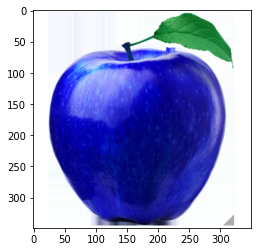

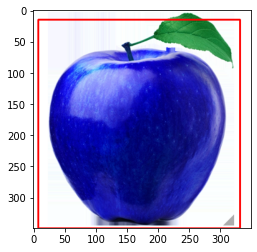

In [3]:
for e,i in enumerate(os.listdir(annot_path)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(img_path,filename))
        df = pd.read_csv(os.path.join(annot_path,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [4]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [5]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [6]:
train_images=[]
train_labels=[]
for e,i in enumerate(os.listdir(annot_path)):
    print(i)
    try:
        filename = i.split(".")[0]+".jpg"
        image = cv2.imread(os.path.join(img_path,filename))
        df = pd.read_csv(os.path.join(annot_path,i))
        gtvalues=[]
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = image.copy()
        counter = 0
        falsecounter = 0
        flag = 0
        fflag = 0
        bflag = 0
        for e,result in enumerate(ssresults):
            if e < 2000 and flag == 0:
                for gtval in gtvalues:
                    x,y,w,h = result
                    iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                    if counter < 30:
                        if iou > 0.70:
                            timage = imout[y:y+h,x:x+w]
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                            train_images.append(resized)
                            train_labels.append(1)
                            counter += 1
                    else :
                        fflag =1
                    if falsecounter <30:
                        if iou < 0.3:
                            timage = imout[y:y+h,x:x+w]
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                            train_images.append(resized)
                            train_labels.append(0)
                            falsecounter += 1
                    else :
                        bflag = 1
                if fflag == 1 and bflag == 1:
                    print("inside")
                    flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

apple_1.csv
inside
apple_10.csv
apple_11.csv
apple_12.csv
apple_13.csv
apple_14.csv
apple_15.csv
apple_16.csv
inside
apple_17.csv
inside
apple_18.csv
apple_19.csv
apple_2.csv
apple_20.csv
apple_21.csv
apple_22.csv
inside
apple_23.csv
inside
apple_24.csv
apple_25.csv
apple_26.csv
apple_27.csv
inside
apple_28.csv
inside
apple_29.csv
apple_3.csv
apple_30.csv
apple_31.csv
inside
apple_32.csv
apple_33.csv
inside
apple_35.csv
apple_36.csv
inside
apple_37.csv
inside
apple_38.csv
apple_39.csv
apple_4.csv
apple_40.csv
apple_41.csv
apple_42.csv
inside
apple_43.csv
apple_44.csv
inside
apple_45.csv
apple_46.csv
apple_47.csv
apple_48.csv
inside
apple_49.csv
apple_5.csv
inside
apple_50.csv
apple_51.csv
apple_52.csv
apple_53.csv
inside
apple_54.csv
apple_55.csv
apple_56.csv
apple_57.csv
apple_58.csv
apple_59.csv
apple_6.csv
apple_60.csv
apple_61.csv
apple_62.csv
inside
apple_63.csv
apple_64.csv
apple_65.csv
apple_66.csv
inside
apple_67.csv
apple_68.csv
apple_69.csv
apple_7.csv
apple_70.csv
apple_71.c

In [7]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

print(X_new.shape)
print(y_new.shape)

(14511, 224, 224, 3)
(14511,)


In [8]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [9]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553467096/553467096 [==============================] - 12s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [10]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [11]:
X= vggmodel.layers[-2].output

In [12]:
predictions = Dense(2, activation="softmax")(X)

In [14]:
model_final = Model(vggmodel.input, predictions)

In [15]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

c:\Users\Xurso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [17]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [19]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [20]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [21]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(13059, 224, 224, 3) (1452, 224, 224, 3) (13059, 2) (1452, 2)


In [22]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [24]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [27]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 50, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])


C:\Users\Xurso\AppData\Local\Temp\ipykernel_30776\3247725977.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 50, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.1336 - accuracy: 0.9500
Epoch 1: val_loss did not improve from 0.02574
10/10 [==============================] - 77s 8s/step - loss: 0.1336 - accuracy: 0.9500 - val_loss: 0.0581 - val_accuracy: 0.9844
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.1161 - accuracy: 0.9656
Epoch 2: val_loss did not improve from 0.02574
10/10 [==============================] - 71s 7s/step - loss: 0.1161 - accuracy: 0.9656 - val_loss: 0.1557 - val_accuracy: 0.9688
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.1001 - accuracy: 0.9750
Epoch 3: val_loss did not improve from 0.02574
10/10 [==============================] - 74s 7s/step - loss: 0.1001 - accuracy: 0.9750 - val_loss: 0.2687 - val_accuracy: 0.9062
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.1733 - accuracy: 0.9688
Epoch 4: val_loss did not improve from 0.02574
10/10 [==============================] - 72s 7s/s

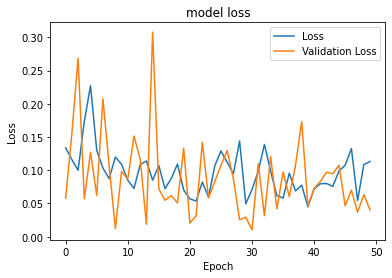

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

1/1 [==============================] - 0s 302ms/step
Not Fruit


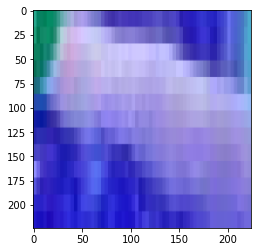

In [53]:
im = X_test[60]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("Fruit")
else:
    print("Not Fruit")

1/1 [==============================] - 1s 771ms/step


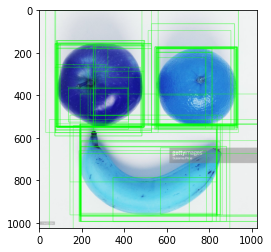

In [47]:
z=0
for e,i in enumerate(os.listdir(img_path)):
    if i.startswith("mixed_5"):
        z += 1
        img = cv2.imread(os.path.join(img_path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)
        break

In [44]:
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay

In [43]:
# You can visualize the results with a confusion matrix.
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
    c_mat = np.zeros((y_test.shape[1],y_test.shape[1]))
    for i in range(len(y_true)):
        c_mat[y_classified[i], y_true[i] ] += 1

    group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

    plt.figure(figsize=(12,10))
    sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
    plt.title("Confusion Matrix")
    plt.ylabel('Output Class')
    plt.xlabel('Target Class')

46/46 [==============================] - 302s 7s/step - loss: 0.0704 - accuracy: 0.9738
Test loss: 0.07044859230518341
Test accuracy: 0.9738292098045349
46/46 [==============================] - 340s 7s/step
Confusion matrix: 
 [[553   2]
 [ 36 861]]


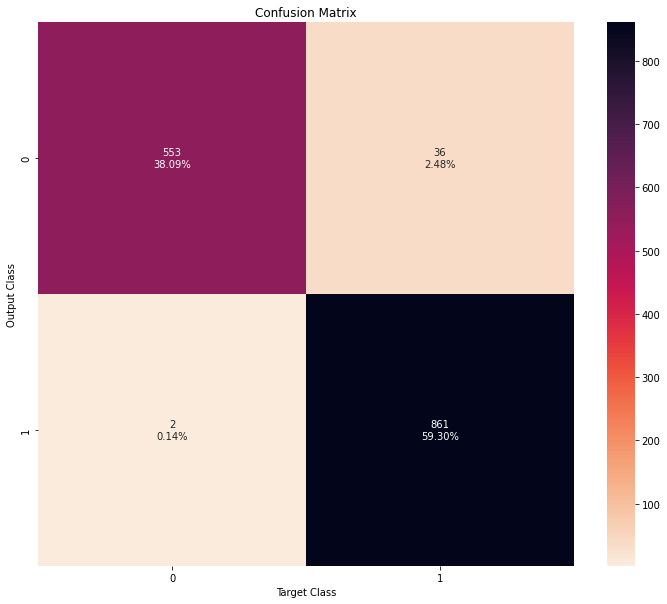

In [46]:
# Evaluate the trained model using keras built-in function
score = model_final.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(model_final.predict(X_test), axis=1)
y_true =  np.argmax(y_test, axis=1)
# Compute the confusion matrix
print("Confusion matrix: \n", confusion_matrix(y_true, y_classified))

# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)